1. 读取data中2023_6文件夹中的openrank数据集，分析美国排名前一百的项目的的value的最大值、最小值、均值以及中位数。

In [2]:
import pandas as pd  
  
# 读取CSV文件  
df = pd.read_csv('open_rank_20236.csv')  
  
# 假设你要读取的列名为 'value'  
value_column = df['value']  
  
# 计算最大值、最小值、均值和中位数  
max_value = value_column.max()  
min_value = value_column.min()  
mean_value = value_column.mean()  
median_value = value_column.median()  
  
# 输出结果  
print(f"最大值: {max_value}")  
print(f"最小值: {min_value}")  
print(f"均值: {mean_value}")  
print(f"中位数: {median_value}")

最大值: 1394.45
最小值: 200.68
均值: 346.9679
中位数: 273.66999999999996


2. 读取data中2022文件夹下的activity_2020文件，分析美国排名前十的项目的平均增长率。

3. data/2022/china_2022.csv表示中国开源领域排名前十的企业。data/2022/global_2022.csv表示开源领域全球前十的的企业，请通过各种统计指标比较两者的各种数据差异。

4. 贝叶斯定理

    贝叶斯定理参考：https://zh.wikipedia.org/wiki/%E8%B4%9D%E5%8F%B6%E6%96%AF%E5%AE%9A%E7%90%86

    根据 OpenLeaderboard 上对前 10000 个活跃的项目统计，工具组件型项目占比 50 %，系统应用型占比 25 %，而内容资源型（非软件类）项目占比 25 %，成三分天下的态势。

    非软件类项目中，带有 HTML/Markdown 标签的项目占 85 %，而软件类项目中带 HTML/Markdown标签的项目占比则为 10 %（注：HTML/Markdown 一般可用来书写文档内容）

    工具组件型项目中，JavaScript 语言的项目占比 35 %，而非工具组件型项目中， JavaScript 语言的项目占比则为 10 %（注：JavaScript 是一种脚本编程语言，可以在网页上实现复杂的功能）

    已知一个项目带有 HTML/Markdown 标签，那么该项目是非软件型项目的概率是多少？

5. 接上文，已知一个项目是由 JavaScript 语言编写的，那么它是工具组件型项目的概率是多少？

6. 根据以下数据建立可视化无向图

    user = [1, 2, 3, 4] 

    edge = [(1, 2), (2, 3), (3, 4), (4, 1)]

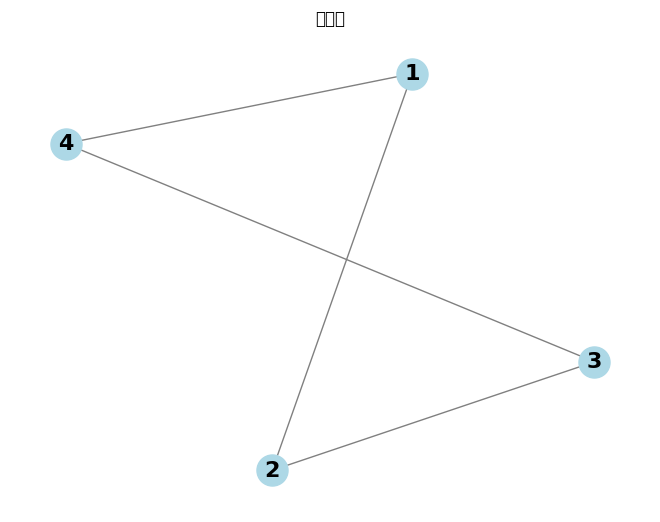

In [4]:
import networkx as nx  
import matplotlib.pyplot as plt  
  
# 用户节点  
user = [1, 2, 3, 4]  
  
# 边  
edge = [(1, 2), (2, 3), (3, 4), (4, 1)]  
  
# 创建无向图  
G = nx.Graph()  
  
# 添加节点  
for u in user:  
    G.add_node(u)  
  
# 添加边  
for e in edge:  
    G.add_edge(e[0], e[1])  
  
# 绘制图形  
pos = nx.spring_layout(G)  # 使用spring布局算法来确定节点的位置  
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=16, font_weight='bold', edge_color='gray')  
  
# 显示图形  
plt.title('无向图')  
plt.show()

7. 根据以下数据建立可视化**有向图**

    users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    
    edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2),
                (2, 1), (1, 3), (2, 3), (3, 4), (5, 4),
                (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

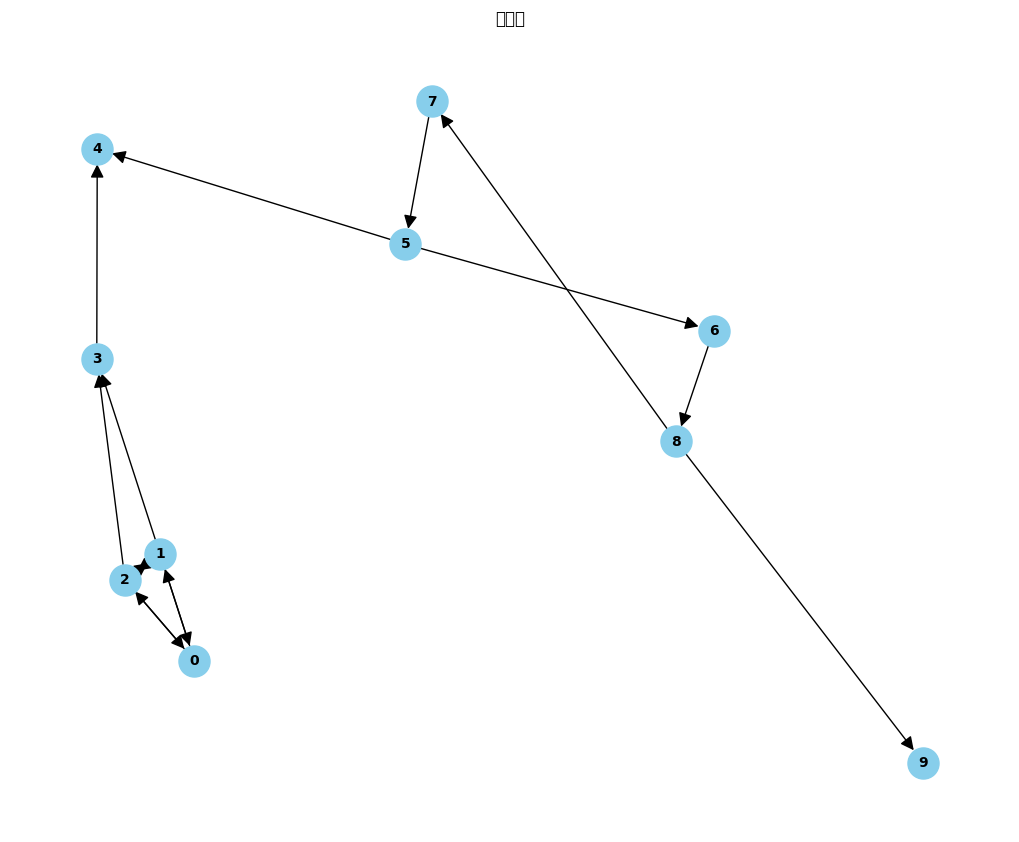

In [7]:
import networkx as nx  
import matplotlib.pyplot as plt  
  
# 定义用户和边  
users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]  
edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2),  
         (2, 1), (1, 3), (2, 3), (3, 4), (5, 4),  
         (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]  
  
# 创建一个有向图  
G = nx.DiGraph()  
  
# 添加节点（实际上在这个例子中，节点已经在边的定义中隐含了，所以可以省略这一步）  
for user in users:  
    G.add_node(user)  
  
# 添加边  
for edge in edges:  
    G.add_edge(edge[0], edge[1])  
  
# 绘制图形  
pos = nx.spring_layout(G)  # 使用spring布局算法来定位节点  
  
plt.figure(figsize=(10, 8))  
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=500, font_size=10, font_weight='bold', arrowsize=20)  
plt.title("有向图")  
plt.show()

8. 针对第七题构建的有向图，计算并输出每个节点的pagerank值。同时根据pagerank调整可视化图的大小，使得PageRank越大的节点在可视化结果中也越大。
    pageRank算法原理：https://zh.wikipedia.org/wiki/PageRank